In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Logistic Regression
### 1.1 Plotting the data

In [10]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex2/ex2/ex2data1.txt'

with open(data_path) as f:
    data = [i.split(',') for i in f.read().splitlines()]
    data = np.array(data).astype(float)

In [93]:
df_data = pd.DataFrame(data, columns = ['E1', 'E2', 'Label'])

X = data[:, [0,1]]
y = data[:, 2]
m = X.shape[0]
n = X.shape[1]

Text(0,0.5,'Exam 2 Score')

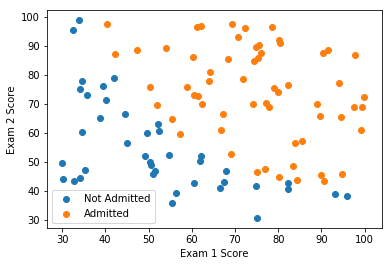

In [30]:
plt.scatter(df_data.E1[df_data.Label == 0], df_data.E2[df_data.Label == 0], label='Not Admitted')
plt.scatter(df_data.E1[df_data.Label == 1], df_data.E2[df_data.Label == 1], label='Admitted')
    
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

## 1.2 Implementation
### 1.2.1 Warmup exercise: Sigmoid Function

In [35]:
def sigmoid(X):
    
    return 1 / (1 + np.exp(-X))

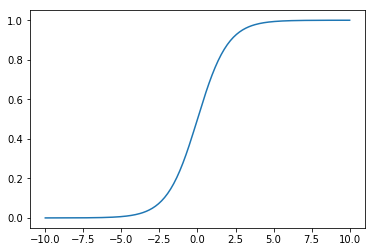

In [44]:
# Test vector input
plt.plot(np.linspace(-10, 10, 200), sigmoid(np.linspace(-10, 10, 200)))

### 1.2.2 Cost Function & Gradient

In [ ]:
def costFunction()